In [175]:
import numpy as np
from scipy.integrate import fixed_quad
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'
import numpy as np
from scipy.special import roots_legendre, eval_legendre

In [185]:
roots, weights = roots_legendre(3)
roots, weights

(array([-0.77459667,  0.        ,  0.77459667]),
 array([0.55555556, 0.88888889, 0.55555556]))

In [106]:
def min_fixed_only_quad(f, N):
    roots, weights = roots_legendre(N)
    xi = roots
    wi = weights
    return sum(w*(f(x)) for w, x in zip(wi, xi))

In [186]:
def f(x):
    return np.exp(x)

print(f"""
n = 1: I ≈ {min_fixed_only_quad(f, 1)}, Abs error = {(f(1) - f(-1)) - min_fixed_only_quad(f, 1)}
n = 2: I ≈ {min_fixed_only_quad(f, 2)}, Abs error = {(f(1) - f(-1)) - min_fixed_only_quad(f, 2)}
n = 3: I ≈ {min_fixed_only_quad(f, 3)}, Abs error = {(f(1) - f(-1)) - min_fixed_only_quad(f, 3)}
n = 4: I ≈ {min_fixed_only_quad(f, 4)}, Abs error = {(f(1) - f(-1)) - min_fixed_only_quad(f, 4)}
n = 5: I ≈ {min_fixed_only_quad(f, 5)}, Abs error = {(f(1) - f(-1)) - min_fixed_only_quad(f, 5)}
""")


n = 1: I ≈ 2.0, Abs error = 0.35040238728760276
n = 2: I ≈ 2.3426960879097307, Abs error = 0.007706299377872039
n = 3: I ≈ 2.3503369286800115, Abs error = 6.54586075912178e-05
n = 4: I ≈ 2.3504020921563766, Abs error = 2.9513122612456755e-07
n = 5: I ≈ 2.350402386462826, Abs error = 8.247766913882515e-10



In [188]:
2.3504020921563766 - 2.350402092156377

-4.440892098500626e-16

적분 범위를 변환시켜 모두에게 허용되는 함수

In [282]:
def f(x):
    return np.exp(x)

def min_fixed_any_range(f, a, b, n):
    g = lambda x: (b - a)/2 * f((b-a)/2*x + (a+b)/2) 
    roots, weights = roots_legendre(n)
    xi = roots
    wi = weights
    return sum(w*(g(x)) for w, x in zip(wi, xi))

In [287]:
def f(x):
    return np.exp(x)
def min_fixed_any_range(f, a, b, n):
    return min_fixed_only_quad(lambda x: (b - a)/2 * f((b-a)/2*x + (a+b)/2) , n)


In [291]:
min_fixed_any_range(f, -1, 1, 2)

2.3426960879097307

In [295]:
min_fixed_any_range(lambda x: 4 / (1 + x**2), 0, 1, 5) - np.pi

-1.3705040213807251e-08

위의 함수와 비교 (절대 오차가 아닌, 코드내에 오차가 있는지)

In [194]:
print(f"""
n = 1: I ≈ {min_fixed_any_range(f, -1, 1, 1)}, Abs error = {(f(1) - f(-1)) - min_fixed_any_range(f, -1, 1, 1)}
n = 2: I ≈ {min_fixed_any_range(f, -1, 1, 2)}, Abs error = {(f(1) - f(-1)) - min_fixed_any_range(f, -1, 1, 2)}
n = 3: I ≈ {min_fixed_any_range(f, -1, 1, 3)}, Abs error = {(f(1) - f(-1)) - min_fixed_any_range(f, -1, 1, 3)}
n = 4: I ≈ {min_fixed_any_range(f, -1, 1, 4)}, Abs error = {(f(1) - f(-1)) - min_fixed_any_range(f, -1, 1, 4)}
n = 5: I ≈ {min_fixed_any_range(f, -1, 1, 5)}, Abs error = {(f(1) - f(-1)) - min_fixed_any_range(f, -1, 1, 5)}
""")


n = 1: I ≈ 2.0, Abs error = 0.35040238728760276
n = 2: I ≈ 2.3426960879097307, Abs error = 0.007706299377872039
n = 3: I ≈ 2.3503369286800115, Abs error = 6.54586075912178e-05
n = 4: I ≈ 2.3504020921563766, Abs error = 2.9513122612456755e-07
n = 5: I ≈ 2.350402386462826, Abs error = 8.247766913882515e-10



기존의 scipy packagescipy 의 scipy.kntegrate.fixed_quad 처럼 사용
그러나 결과물이 리스트가 아니기 때문에, [0] 부분은 제거해준다.

In [296]:
exact_value = np.pi
target_acc = 10**(-5)

current_acc = 1
N = 2
result = 0
while current_acc > target_acc and N < 20:
    result = min_fixed_any_range(lambda x: 4 /(1 + x*x), 0, 1, n=N)
    current_acc = abs(exact_value - result)
    N += 1
    
print(f"approximate value = {result}, number of sample points = {N}")
print(f"Abs error = {exact_value - result}")

approximate value = 3.141592639884753, number of sample points = 6
Abs error = 1.3705040213807251e-08


In [299]:
exact_value = 1e10 * np.pi
target_acc = 10**(-5)

current_acc = 1
N = 2
result = 0
while current_acc > target_acc and N < 20:
    result = min_fixed_any_range(lambda x: 4 * 1e10 /(1 + x*x), 0, 1, n=N)
    current_acc = abs(exact_value - result)
    N += 1
    
print(f"approximate value = {result}, number of sample points = {N}")
print(f"Abs error = {exact_value - result}")

approximate value = 31415926535.897938, number of sample points = 13
Abs error = -7.62939453125e-06


In [159]:
exact_value = np.log(2)
target_acc = 10**(-7)

current_acc = 1
N = 2
result = 0
while current_acc > target_acc and N < 100:
    result = min_fixed_any_range(lambda x: 1/x, 1, 2, n=N)
    current_acc = abs(exact_value - result)
    N += 1
    
print(f"approximate value = {result}, number of sample points = {N}")
print(f"Abs error = {exact_value - result}")

approximate value = 0.6931471578530402, number of sample points = 6
Abs error = 2.270690513395124e-08


<Figure size 640x480 with 0 Axes>

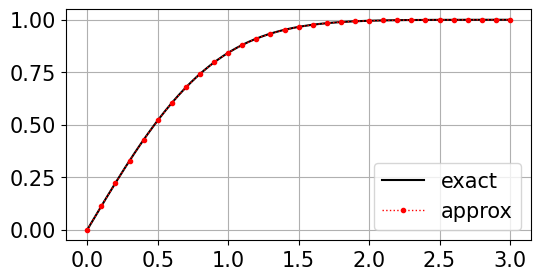

In [300]:
from scipy import special

partition = np.linspace(0, 3, 31)
partial_sums = [
    min_fixed_any_range(lambda t: np.exp(-t*t), a, b, n=5)
    for (a, b) in zip(partition[:-1], partition[1:])
]

xs = partition
approx_erf = np.cumsum(partial_sums) * 2/np.sqrt(np.pi)
approx_erf = np.hstack(([0], approx_erf)) # erf(0) = 0

x_exact = np.linspace(0, 3, 200)
y_exact = special.erf(x_exact)

plt.figure()

plt.figure(figsize=(6,3))
plt.plot(x_exact, y_exact, "-k", label="exact")
plt.plot(xs, approx_erf, ".:r", lw=1, label="approx")
plt.legend()
plt.grid()
plt.savefig("Error_Funcion.pdf")

0.9999779095030018


<Figure size 640x480 with 0 Axes>

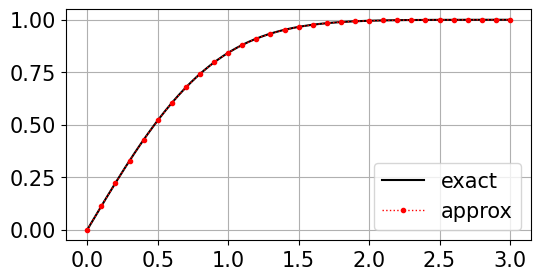

In [301]:
from scipy import special

partition = np.linspace(0, 3, 31)
partial_sums = [
    min_fixed_any_range(lambda t: np.exp(-t*t), a, b, n=5)
    for (a, b) in zip(partition[:-1], partition[1:])
]

xs = partition
approx_erf = np.cumsum(partial_sums) * 2/np.sqrt(np.pi)
print(np.sum(partial_sums) * 2/np.sqrt(np.pi))
approx_erf = np.hstack(([0], approx_erf)) # erf(0) = 0

x_exact = np.linspace(0, 3, 200)
y_exact = special.erf(x_exact)

plt.figure()

plt.figure(figsize=(6,3))
plt.plot(x_exact, y_exact, "-k", label="exact")
plt.plot(xs, approx_erf, ".:r", lw=1, label="approx")
plt.legend()
plt.grid()
plt.savefig("Error_Funcion.pdf")

In [279]:
approx_erf - y_exact

ValueError: operands could not be broadcast together with shapes (10,) (200,) 

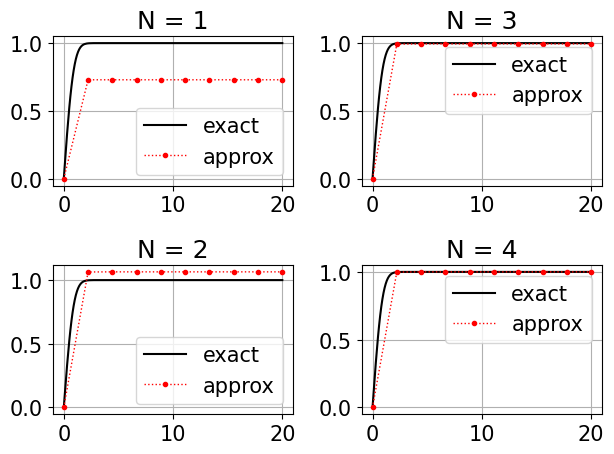

In [281]:
from scipy import special
fig, ax = plt.subplots(2, 2)
partition = np.linspace(0, 20, 10)
partial_sums = [
    min_fixed_any_range(lambda t: np.exp(-t*t), a, b, n=1)
    for (a, b) in zip(partition[:-1], partition[1:])
]

xs = partition
approx_erf = np.cumsum(partial_sums) * 2/np.sqrt(np.pi)
approx_erf = np.hstack(([0], approx_erf)) # erf(0) = 0

x_exact = np.linspace(0, 20, 200)
y_exact = special.erf(x_exact)


ax[0, 0].plot(x_exact, y_exact, "-k", label="exact")
ax[0, 0].plot(xs, approx_erf, ".:r", lw=1, label="approx")
ax[0, 0].grid()
ax[0, 0].legend()




partition = np.linspace(0, 20, 10)
partial_sums = [
    min_fixed_any_range(lambda t: np.exp(-t*t), a, b, n=2)
    for (a, b) in zip(partition[:-1], partition[1:])
]

xs = partition
approx_erf = np.cumsum(partial_sums) * 2/np.sqrt(np.pi)
approx_erf = np.hstack(([0], approx_erf)) # erf(0) = 0

x_exact = np.linspace(0, 20, 200)
y_exact = special.erf(x_exact)

#plt.subplot(222)
#plt.plot(x_exact, y_exact, "-k", label="exact")

ax[1, 0].plot(x_exact, y_exact, "-k", label="exact")
ax[1, 0].plot(xs, approx_erf, ".:r", lw=1, label="approx")
ax[1, 0].grid()
ax[1, 0].legend()





partition = np.linspace(0, 20, 10)
partial_sums = [
    min_fixed_any_range(lambda t: np.exp(-t*t), a, b, n=3)
    for (a, b) in zip(partition[:-1], partition[1:])
]

xs = partition
approx_erf = np.cumsum(partial_sums) * 2/np.sqrt(np.pi)
approx_erf = np.hstack(([0], approx_erf)) # erf(0) = 0

x_exact = np.linspace(0, 20, 200)
y_exact = special.erf(x_exact)

#plt.subplot(223)
#plt.plot(x_exact, y_exact, "-k", label="exact")
#plt.plot(xs, approx_erf, ".:r", lw=1, label="approx")


ax[0, 1].plot(x_exact, y_exact, "-k", label="exact")
ax[0, 1].plot(xs, approx_erf, ".:r", lw=1, label="approx")
ax[0, 1].grid()
ax[0, 1].legend()








partition = np.linspace(0, 20, 10)
partial_sums = [
    min_fixed_any_range(lambda t: np.exp(-t*t), a, b, n=4)
    for (a, b) in zip(partition[:-1], partition[1:])
]

xs = partition
approx_erf = np.cumsum(partial_sums) * 2/np.sqrt(np.pi)
approx_erf = np.hstack(([0], approx_erf)) # erf(0) = 0

x_exact = np.linspace(0, 20, 200)
y_exact = special.erf(x_exact)

#plt.subplot(224)
#plt.plot(x_exact, y_exact, "-k", label="exact")
#plt.plot(xs, approx_erf, ".:r", lw=1, label="approx")
ax[1, 1].plot(x_exact, y_exact, "-k", label="exact")
ax[1, 1].plot(xs, approx_erf, ".:r", lw=1, label="approx")
ax[1, 1].grid()
ax[1, 1].legend()

ax[0, 0].title.set_text("N = 1")
ax[0, 1].title.set_text("N = 3")
ax[1, 0].title.set_text("N = 2")
ax[1, 1].title.set_text("N = 4")
plt.tight_layout()
plt.savefig("Error_Funcion1.pdf")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(x, y1)
ax[0, 1].plot(x, y2)
ax[1, 0].plot(x, y3)
ax[1, 1].plot(x,y4)


ax[0, 0].plot(x, y1)
ax[0, 1].plot(x, y2)
ax[1, 0].plot(x, y3)
ax[1, 1].plot(x,y4)

ax[0, 0].set_title("Sine function")
ax[0, 1].set_title("Cosine function")
ax[1, 0].set_title("Sigmoid function")
ax[1, 1].set_title("Exponential function")

fig.tight_layout()
plt.show()

In [170]:
def inner_sum(y):
    return min_fixed_any_range(lambda x: y**x, 0, 1, 11)
    
outer_sum = min_fixed_any_range(inner_sum, 1, 2, 11)

print("approximatio = {}, absolute error = {}"
      .format(outer_sum, abs(outer_sum - 1.2292741342880657562)))

approximatio = 1.229274134361613, absolute error = 7.354716835550335e-11


NameError: name 'g' is not defined